## Gradient Decent
Predicted y is as follows:
$$ y^{'} = w^{T}x + c $$

$$ L = \frac{1}{N}\sum_{i=1}^{N}(y_{i} - y^{'}_{i})^{2} = \frac{1}{N}\sum_{i=1}^{N}(y_{i} - (w^{T}x_{i} + b))^{2} $$
Now find the gradients wrt w and b 
$$ \frac{\partial L}{\partial w}  = \frac{1}{N}\sum_{i=1}^{N}-2x_{i}(y_{i} - (w^{T}x_{i} + b)) $$
$$ \frac{\partial L}{\partial b}  = \frac{1}{N}\sum_{i=1}^{N}-2(y_{i} - (w^{T}x_{i} + b)) $$

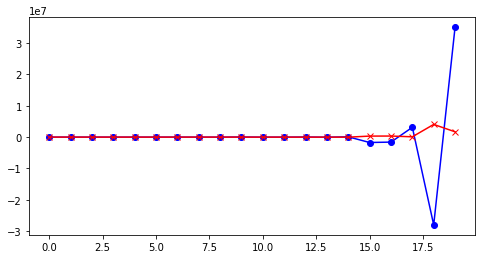

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1,101,1)
w = 2
b = 3
k = 0.001
nslice = 10
noise = np.random.rand(100)
wLast = 0.01
bLast = 0.00
y = x*w + noise + b   # generaty y and add noise
wHist = []
bHist = []
def get_slice(x, y, n):
    start = np.random.randint(0,101)
    return x[start:start+n], y[start:start+n]

def get_gradient_w(w_gradient,b, x, y):
    diff  =  2*(y - w_gradient*x - b)
    #print(f" diff: {diff}")
    n = len(x)
    delta_w = np.sum(diff*x)
    #print(delta_w)
    w_gradient = w_gradient + k*delta_w/n
    return w_gradient

def get_gradient_b(w_gradient,b, x, y):
    diff  =  2*(y - w_gradient*x - b)
    #print(f" diff: {diff}")
    n = len(x)
    delta_w = np.sum(diff)
    #print(delta_w)
    b = b + k*delta_w/n
    return b
for i in range(20):
    x_slice, y_slice = get_slice(x, y,nslice)
    wLast = get_gradient_w(wLast, bLast, x_slice, y_slice)
    bLast = get_gradient_b(wLast, bLast, x_slice, y_slice)
    wHist.append(wLast)
    bHist.append(bLast)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(len(wHist)),wHist, c='b', marker='o')
ax.plot(np.arange(len(bHist)),bHist, c='r', marker='x')